# Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing = pd.read_csv("housingdata.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


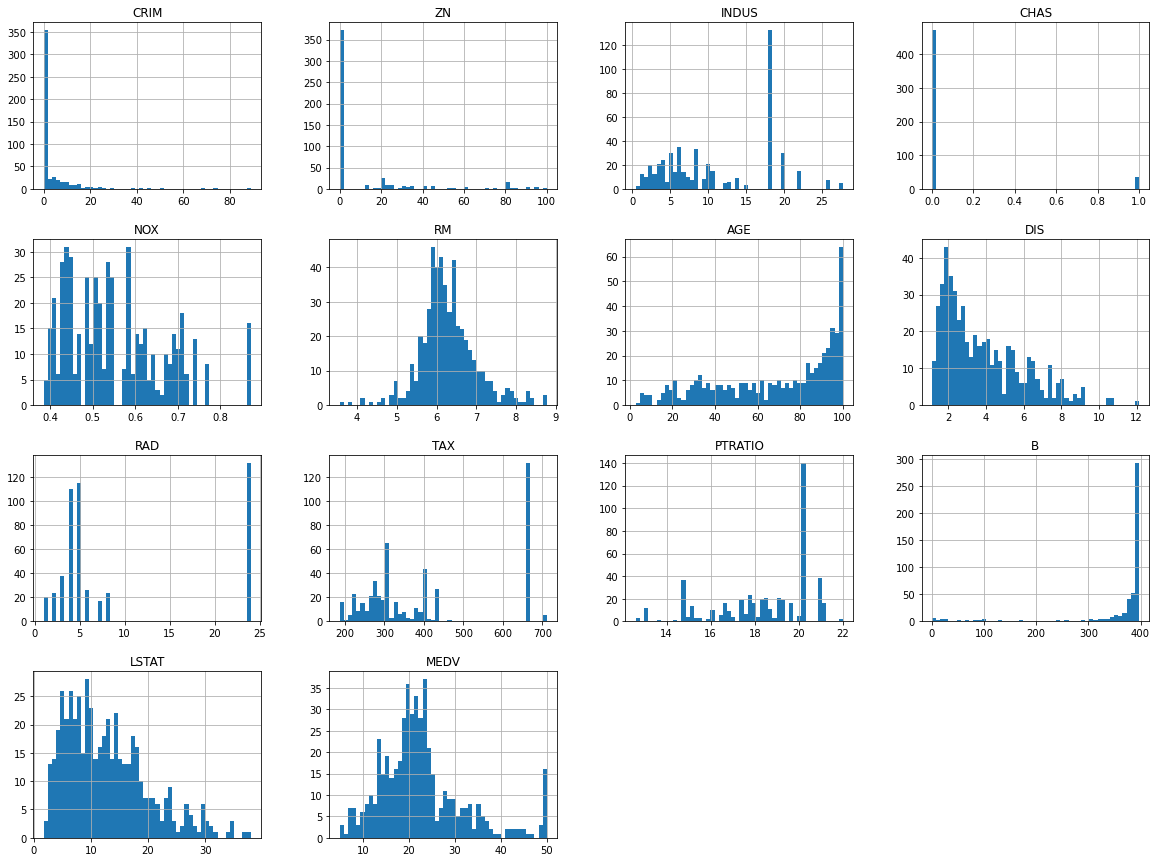

In [7]:
housing.hist(bins=50,figsize=(20,15));

## Train-Test Splitting

np.random.seed(50)
def split_train_test(data, test_ratio):
    np.random.seed(50)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
#train_set, test_set = split_train_test(housing, 0.2)

In [9]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=50)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277,18.6,394.87,10.97,24.4
183,0.10008,0.0,2.46,0,0.488,6.563,95.6,2.8470,3,193,17.8,396.90,5.68,32.5
109,0.26363,0.0,8.56,0,0.520,6.229,91.2,2.5451,5,384,20.9,391.23,15.55,19.4
357,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7
293,0.08265,0.0,13.92,0,0.437,6.127,18.4,5.5027,4,289,16.0,396.90,8.58,23.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21,19.3
93,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21,25.0
211,0.37578,0.0,10.59,1,0.489,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,19.3
449,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0


In [13]:
strat_test_set["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
strat_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
housing = strat_train_set.copy()

### Looking for Correlations

In [16]:
corr_matrix = housing.corr()

In [17]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.700261
ZN         0.349197
B          0.340633
DIS        0.248039
CHAS       0.172721
AGE       -0.376713
RAD       -0.388637
CRIM      -0.392020
NOX       -0.431417
TAX       -0.478103
INDUS     -0.489244
PTRATIO   -0.514321
LSTAT     -0.737829
Name: MEDV, dtype: float64

1 = strong positive correlation


-1 = strong negative correlation

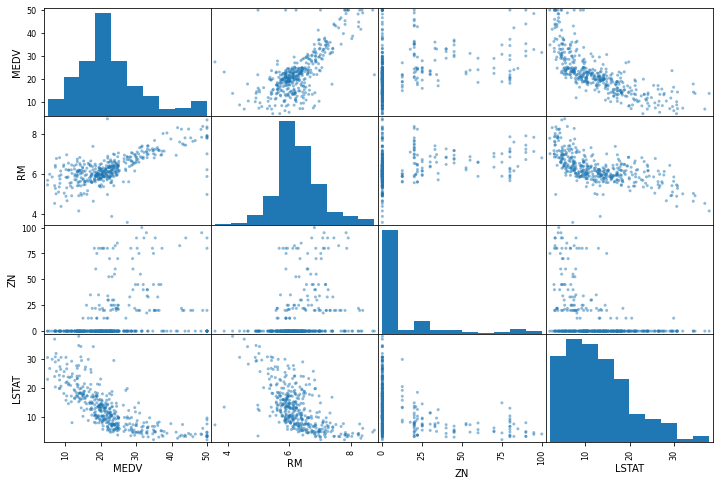

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8));

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

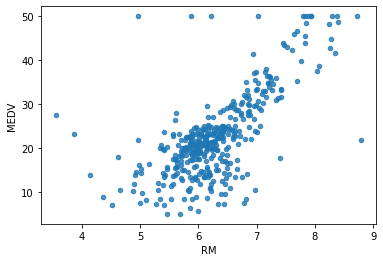

In [19]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

### Trying Out Attribute Combinations

In [20]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [21]:
housing["TAXRM"]

465    115.645077
394    113.130627
433    103.480423
272     34.108290
230     51.329209
          ...    
288     46.397466
276     34.952525
405    117.191624
290     35.709080
469    116.576230
Name: TAXRM, Length: 404, dtype: float64

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
465,3.16360,0.0,18.10,0,0.655,5.759,48.2,3.0665,24,666,20.2,334.40,14.13,19.9,115.645077
394,13.35980,0.0,18.10,0,0.693,5.887,94.7,1.7821,24,666,20.2,396.90,16.35,12.7,113.130627
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,100.19,16.22,14.3,103.480423
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73,24.4,34.108290
230,0.53700,0.0,6.20,0,0.504,5.981,68.1,3.6715,8,307,17.4,378.35,11.65,24.3,51.329209


In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.700261
ZN         0.349197
B          0.340633
DIS        0.248039
CHAS       0.172721
AGE       -0.376713
RAD       -0.388637
CRIM      -0.392020
NOX       -0.431417
TAX       -0.478103
INDUS     -0.489244
PTRATIO   -0.514321
TAXRM     -0.545431
LSTAT     -0.737829
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

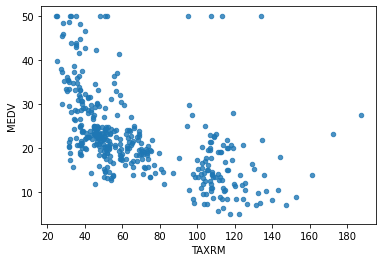

In [24]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [25]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

### Missing Values


To take care of missing values, you have three options:

    1. Get rid of the missing data points
    2. Get rid of the whole attribute
    3. Set the value to some value (0, mean or median)

In [26]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape

(399, 13)

In [27]:
housing.drop("RM", axis=1).shape #Option 2
#Note that there is no RM  column and also note that the original dataframe will be the same 
#unless and untill you use the attribute inplace = True

(404, 12)

In [28]:
median = housing["RM"].median()
median

6.174

In [29]:
housing["RM"].fillna(median)

465    5.759
394    5.887
433    6.436
272    6.538
230    5.981
       ...  
288    6.315
276    7.267
405    5.683
290    6.861
469    5.713
Name: RM, Length: 404, dtype: float64

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([2.74475e-01, 0.00000e+00, 9.12500e+00, 0.00000e+00, 5.38000e-01,
       6.17400e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.30000e+02,
       1.90000e+01, 3.90925e+02, 1.13300e+01])

In [32]:
X = imputer.transform(housing)

In [33]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [34]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.903992,11.178218,11.079530,0.069307,0.557779,6.276755,68.893069,3.764270,9.641089,409.183168,18.421535,353.589356,12.784728
std,9.317397,23.329056,6.868385,0.254290,0.117331,0.733646,28.056500,2.120481,8.740391,169.581271,2.192409,95.138237,7.362591
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.130000,0.000000,0.452000,5.875750,45.075000,2.070275,4.000000,279.000000,17.000000,373.475000,7.092500
50%,0.274475,0.000000,9.125000,0.000000,0.538000,6.174000,78.200000,3.122200,5.000000,330.000000,19.000000,390.925000,11.330000
75%,3.716458,12.500000,18.100000,0.000000,0.631000,6.630250,94.300000,5.104475,24.000000,666.000000,20.200000,395.755000,17.127500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Primarily, three types of objects 

1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - fits the dataset and calculates internal paramteres
2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transform.
3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictors.

### Feature Scaling

Primarily two types of feature scaling methods:
    
    1. Min-max scaling (Normalization)
        (value - min)/(max - min)
        Sklearn provides a class called MinMaxScaler for this
        
    2. Standardization
        (value - mean)/std
        Sklearn provides a class called StandardScaler for this

### Creating a Piepline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), #add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [36]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [37]:
housing_num_tr.shape

(404, 13)

In [38]:
housing_labels.shape

(404,)

## Selecting a desired model for Dragon Real Estate

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [40]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [41]:
prepared_data = my_pipeline.transform(some_data)

In [42]:
model.predict(prepared_data)

array([20.21 , 11.857, 14.449, 24.198, 23.456])

In [43]:
list(some_labels)

[19.9, 12.7, 14.3, 24.4, 24.3]

### Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [45]:
rmse

1.3536732068671884

### Using better evaluation technique - Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [47]:
rmse_scores

array([2.43073119, 2.51675294, 3.92997787, 4.8195163 , 3.69870109,
       4.42278277, 4.76317373, 3.11216105, 3.03746957, 2.63225426])

In [48]:
def print_score(scores):
    print("Scores: ", scores)
    print("Mean: " , scores.mean())
    print("Standard deviation: ", scores.std())

In [49]:
print_score(rmse_scores)

Scores:  [2.43073119 2.51675294 3.92997787 4.8195163  3.69870109 4.42278277
 4.76317373 3.11216105 3.03746957 2.63225426]
Mean:  3.5363520782846116
Standard deviation:  0.8733186265814232


### Saving the model

In [50]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

### Testing the model on test data

In [51]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [52]:
final_rmse

2.9388465240901684

In [54]:
for i in final_predictions:
    print(i)

23.07
27.13499999999998
17.725999999999992
20.448000000000004
22.147999999999996
45.15599999999999
21.832000000000008
23.443000000000012
33.722999999999985
24.602999999999998
23.07299999999999
19.768999999999995
10.858999999999991
14.388999999999996
20.419999999999987
21.70799999999999
24.055000000000003
27.146
26.188999999999986
19.892000000000007
13.677000000000005
25.11999999999999
28.961999999999986
19.886000000000035
25.45800000000002
22.627999999999975
30.417999999999978
47.53
14.907
14.319999999999995
22.48399999999999
20.33399999999999
15.373000000000001
22.606999999999992
22.096999999999994
18.58900000000001
20.584999999999994
21.49299999999999
26.72499999999999
25.507999999999985
17.470999999999993
11.622
20.651000000000003
20.284999999999986
18.97999999999998
12.86899999999999
11.216999999999992
18.384000000000007
28.477000000000004
40.57400000000001
20.239999999999995
20.491000000000003
26.538999999999977
30.09699999999997
20.727999999999984
18.512000000000004
21.6399999999

In [55]:
for t in Y_test:
    print(t)

24.4
32.5
19.4
21.7
23.9
50.0
20.5
24.8
32.7
23.7
22.9
21.1
12.3
14.5
21.7
20.6
24.2
24.0
28.4
16.6
16.7
36.2
26.6
22.9
26.5
22.0
32.4
50.0
18.4
17.8
26.4
19.4
15.6
24.5
19.1
19.1
17.4
21.2
26.2
28.4
19.5
13.3
21.5
16.2
19.2
11.9
12.8
20.0
31.5
50.0
16.8
21.2
29.0
31.1
19.4
19.9
22.0
20.3
24.5
34.9
16.1
21.7
23.0
19.5
19.5
23.8
13.1
18.4
12.1
18.0
13.6
22.9
15.0
13.1
24.3
50.0
25.2
16.6
17.8
18.7
20.6
27.9
20.0
22.2
23.1
21.7
8.4
23.0
14.9
23.2
22.2
20.1
33.3
16.4
23.7
13.9
36.2
19.3
25.0
19.3
13.0
17.8


In [56]:
prepared_data[0]

array([-0.07956194, -0.47974844,  1.02341017, -0.27288841,  0.82963206,
       -0.70660406, -0.73846442, -0.32947012,  1.64485945,  1.51629519,
        0.81219818, -0.20194982,  0.1829438 ])

### Using the model

In [57]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')

In [58]:
features = np.array([[-0.07956194, -0.47974844,  1.02341017, -0.27288841,  0.82963206,
       -0.70660406, -0.73846442, -0.32947012,  1.64485945,  1.51629519,
        0.81219818, -0.20194982,  0.1829438 ]])
model.predict(features)

array([20.21])